## Benchmarking methods

Here we benchmark separability of different methods using silouhette score. It should be noted there are limitations, namely, using annotations is currently standard practice, however, it doesn't necessariliy correspond to a biological ground truth (currently we don't have one!) Second methods with perform DR well dependent on dataset, some algoriths are better at modelling different systems better (Koch et al, 2021; Heiser & Lau, 2020) (e.g. discrete data or discrete clusters of data are better with UMAP and tSNE, however, PHATE and PCA are better for continuous ones - VAEs come under this catagory).

### A note on datasets and performance:

https://www.sciencedirect.com/science/article/pii/S2211124720305258

Heiser & Lau, 2020 *"Finally, a careful look at additional synthetic and real-world data confirms that behavior of dimensionality reduction methods is primarily driven by the input cell distance distribution that is modality and dataset specific"*


https://academic.oup.com/bib/article/22/6/bbab304/6347204

Koch et al 2021: *"Furthermore, IVMs can successfully be used as an unsupervised method to predict an optimal clustering of distinct cell types. Our results suggest that it may be worth researchers considering alternate dimensionality reduction methods depending on the desired result. Methods such as LDA or PHATE, despite their relative obscurity in scRNA-seq analysis pipelines, are promising alternatives to traditionally used or recommended methods of cell type differentiation; however, if preservation of global structure is a priority, linear methods such as GRP or PCA are better candidates."*


In [1]:
import os
import pandas as pd
# Example used to generate seeds (note these were kept static for reproducibilty sake :) )
#import random
#rand_seeds = random.sample(range(0,100), 30)
#print(rand_seeds)

# Files have the following structure
#'caff_6_94.csv', caff means run on the consistntly affected dataset with 3 nodes and a seed of 94
# 'runtime_3_14.csv', runtime keeps track of the runtime for the methods (both sig and caff)
# 'sig_3_35.csv',  significantly affected dataset 
files = os.listdir('output/')
caff_3 = []
sig_3 = []
caff_6 = []
sig_6 = []
runtime = pd.DataFrame()
for f in files:
    if 'caff' in f:
        df = pd.read_csv(f'output/{f}')
        if '_3_' in f:
            caff_3.append(df)
        else:
            caff_6.append(df)
    elif 'sig' in f:
        df = pd.read_csv(f'output/{f}')
        if '_3_' in f:
            sig_3.append(df)
        else:
            sig_6.append(df)
    elif 'runtime' in f:
        df = pd.read_csv(f'output/{f}')
        runtime = pd.concat([runtime, df])
    else:
        print(f)
        

comparison.py


In [2]:
runtime

,Tools,Runtime,Dataset,Nodes
0,PHATE,189.461462,consistently affected,3
1,UMAP,124.508325,consistently affected,3
2,PCA,2.572048,consistently affected,3
3,Deep VAE,121.532797,consistently affected,3
4,Shallow VAE,162.713693,consistently affected,3
...,...,...,...,...
0,PHATE,1869.555967,Significantly affected,6
1,UMAP,134.949979,Significantly affected,6
2,PCA,0.790117,Significantly affected,6
3,Deep VAE,113.809467,Significantly affected,6


## Make box plots for each of the following:

To do this, we need to first read in the gene sets. Gene sets were downloaded from AMIGo2 by searching for specific terms. Namely, selecting the organism to be **mus musculus** for each of the searches, 1) prolifereation, then selection of the "direct annotation" **positve regulation of cell population proliferation** (547)	positive regulation of cell population proliferation (GO:0008284) , and . 2) spinal cord development (GO:0021510) 3) hindbrain development (GO:0030902), 4) midbrain development (GO:0030901), 5) forebrain development (GO:0030900). I selected then the "Download" function, and downloaded the "Gene/product (bioentity_label)".


1) Consistently affected datasets 1 for 3 nodes and 1 for 6 nodes  
2) As above for significantly affected datasets  
3) Plots for runtime.  



In [3]:
from scipy import stats
from sciviso import *
from sciutil import SciUtil
import pandas as pd
import numpy as np

gene_id = 'entrezgene_id'
gene_name = 'external_gene_name'

sc_df = pd.read_csv('../../data/input/supps/GO/GO_SPINAL_CORD_DEVELOPMENT_1111.csv')
mb_df = pd.read_csv('../../data/input/supps/GO/GO_MIDBRAIN_DEVELOPMENT_1111.csv')
hb_df = pd.read_csv('../../data/input/supps/GO/GO_HINDBRAIN_DEVELOPMENT_1111.csv')
fb_df = pd.read_csv('../../data/input/supps/GO/GO_FOREBRAIN_DEVELOPMENT_1111.csv')
prolif_df = pd.read_csv('../../data/input/supps/GO/GO_POSTIVE_REG_PROLIF.csv')

sc_go_genes = sc_df.values[:,0]
hb_go_genes = hb_df.values[:,0]
mb_go_genes = mb_df.values[:,0]

fb_go_genes = fb_df.values[:,0]
prolif_go_genes = prolif_df.values[:,0]

# Make sure there are no overlapping genes
sc_go = [g for g in sc_go_genes if g not in hb_go_genes and g not in mb_go_genes and g not in fb_go_genes and g not in prolif_go_genes]
hb_go = [g for g in hb_go_genes if g not in sc_go_genes and g not in mb_go_genes and g not in fb_go_genes and g not in prolif_go_genes]
mb_go = [g for g in mb_go_genes if g not in hb_go_genes and g not in sc_go_genes and g not in fb_go_genes and g not in prolif_go_genes]
fb_go = [g for g in fb_go_genes if g not in hb_go_genes and g not in mb_go_genes and g not in sc_go_genes and g not in prolif_go_genes]
prolif_go = [g for g in prolif_go_genes if g not in hb_go_genes and g not in mb_go_genes and g not in sc_go_genes and g not in fb_go_genes]
sc_go = list(set(sc_go))
hb_go = list(set(hb_go))
mb_go = list(set(mb_go))
fb_go = list(set(fb_go))
prolif_go = list(set(prolif_go))

def get_idxs(genes, g_id):
    grp1_idxs = []
    i = 0
    for g in df[g_id].values:
        if g in genes:
            grp1_idxs.append(i)
        i += 1
    return grp1_idxs

# Get indicies for each, just to make it quicker for the comparisons
sc_idxs = get_idxs(sc_go, gene_name)
fb_idxs = get_idxs(fb_go, gene_name)
mb_idxs = get_idxs(mb_go, gene_name)
hb_idxs = get_idxs(hb_go, gene_name)
prolif_idxs = get_idxs(prolif_go, gene_name)

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

VAE_deep v.s. VAE_lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.187e-04 U_stat=3.440e+02
VAE_deep v.s. PCA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.500e+01
VAE_deep v.s. PHATE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.170e-07 U_stat=4.000e+02
VAE_deep v.s. tSNE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.235e-03 U_stat=3.360e+02
VAE_deep v.s. UMAP: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.398e-07 U_stat=4.000e+02


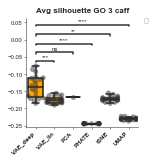

In [19]:
from sciviso import Boxplot
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
methods = ['VAE_deep', 'VAE_lin', 'PCA', 'PHATE', 'tSNE', 'UMAP']
num_nodes = 3
labels = []
values = []
box_colours = ['orange', 'orange', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
box_pairs = []
for m in methods:
    if m != 'VAE_deep':
        box_pairs.append(['VAE_deep', m])

for method in methods:
    cols = [f'{method}_{i}' for i in range(0, num_nodes)]
    # Get the data for that method
    for caff in caff_3:
        # Do this for each dataframe
        data = caff[cols].values
        X = data[sc_idxs + fb_idxs + mb_idxs + hb_idxs + prolif_idxs]
        cluster_labels = ['SC'] * len(sc_idxs) + ['FB'] * len(fb_idxs) + ['MB'] * len(mb_idxs) + ['HB'] * len(hb_idxs) + ['Pro-pro'] * len(prolif_idxs)

        silhouette_avg = silhouette_score(X, cluster_labels)
        labels.append(method)
        values.append(silhouette_avg)
        if method == 'PCA':
            break # Since they are just repeats only keep 1
    
v_df = pd.DataFrame()
v_df['x'] = labels
v_df['y'] = values
boxplot = Boxplot(v_df, "x", "y", figsize=(2,2),title=f'Avg silhouette GO 3 caff', 
                  box_pairs=box_pairs, box_colors=box_colours, 
                  order=methods,
                  add_stats=True, add_dots=True)
boxplot.plot()
plt.savefig('caff_3.svg')
plt.show()

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

VAE_deep v.s. VAE_lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.462e-04 U_stat=4.500e+01
VAE_deep v.s. PCA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
VAE_deep v.s. PHATE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.161e-07 U_stat=4.000e+02
VAE_deep v.s. tSNE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.398e-07 U_stat=4.000e+02
VAE_deep v.s. UMAP: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.398e-07 U_stat=4.000e+02


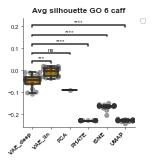

In [20]:

num_nodes = 6
labels = []
values = []

for method in methods:
    cols = [f'{method}_{i}' for i in range(0, num_nodes)]
    # Get the data for that method
    for caff in caff_6:
        # Do this for each dataframe
        data = caff[cols].values
        X = data[sc_idxs + fb_idxs + mb_idxs + hb_idxs + prolif_idxs]
        cluster_labels = ['SC'] * len(sc_idxs) + ['FB'] * len(fb_idxs) + ['MB'] * len(mb_idxs) + ['HB'] * len(hb_idxs) + ['Pro-pro'] * len(prolif_idxs)

        silhouette_avg = silhouette_score(X, cluster_labels)
        labels.append(method)
        values.append(silhouette_avg)
        if method == 'PCA':
            break # Since they are just repeats only keep 1
    
v_df = pd.DataFrame()
v_df['x'] = labels
v_df['y'] = values
boxplot = Boxplot(v_df, "x", "y", figsize=(2,2),title=f'Avg silhouette GO 6 caff', 
                  box_pairs=box_pairs, box_colors=box_colours, 
                  order=methods,
                  add_stats=True, add_dots=True)
boxplot.plot()
plt.savefig('caff_6.svg')
plt.show()

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

VAE_deep v.s. VAE_lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.974e-06 U_stat=1.700e+01
VAE_deep v.s. PCA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.834e-01 U_stat=0.000e+00
VAE_deep v.s. PHATE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.195e-01 U_stat=1.160e+02
VAE_deep v.s. tSNE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.322e-01 U_stat=1.430e+02
VAE_deep v.s. UMAP: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.969e-06 U_stat=3.880e+02


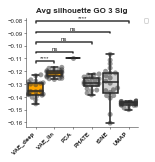

In [21]:

num_nodes = 3
labels = []
values = []

for method in methods:
    cols = [f'{method}_{i}' for i in range(0, num_nodes)]
    # Get the data for that method
    for caff in sig_3:
        # Do this for each dataframe
        data = caff[cols].values
        X = data[sc_idxs + fb_idxs + mb_idxs + hb_idxs + prolif_idxs]
        cluster_labels = ['SC'] * len(sc_idxs) + ['FB'] * len(fb_idxs) + ['MB'] * len(mb_idxs) + ['HB'] * len(hb_idxs) + ['Pro-pro'] * len(prolif_idxs)

        silhouette_avg = silhouette_score(X, cluster_labels)
        labels.append(method)
        values.append(silhouette_avg)
        if method == 'PCA':
                break # Since they are just repeats only keep 1

v_df = pd.DataFrame()
v_df['x'] = labels
v_df['y'] = values
boxplot = Boxplot(v_df, "x", "y", figsize=(2, 2),title=f'Avg silhouette GO 3 Sig', 
                  box_pairs=box_pairs, box_colors=box_colours, 
                  order=methods,
                  add_stats=True, add_dots=True)
boxplot.plot()
plt.savefig('sig_3.svg')
plt.show()

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

VAE_deep v.s. VAE_lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.038e-04 U_stat=4.400e+01
VAE_deep v.s. PCA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
VAE_deep v.s. PHATE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.406e-06 U_stat=3.850e+02
VAE_deep v.s. UMAP: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.718e-07 U_stat=4.000e+02


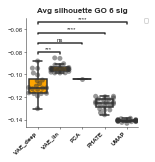

In [22]:
num_nodes = 6
labels = []
values = []
methods = ['VAE_deep', 'VAE_lin', 'PCA', 'PHATE', 'UMAP']
box_colours = ['orange', 'orange', 'lightgrey', 'lightgrey', 'lightgrey']
box_pairs = []
for m in methods:
    if m != 'VAE_deep':
        box_pairs.append(['VAE_deep', m])

for method in methods:
    cols = [f'{method}_{i}' for i in range(0, num_nodes)]
    # Get the data for that method
    for caff in sig_6:
        # Do this for each dataframe
        data = caff[cols].values
        X = data[sc_idxs + fb_idxs + mb_idxs + hb_idxs + prolif_idxs]
        cluster_labels = ['SC'] * len(sc_idxs) + ['FB'] * len(fb_idxs) + ['MB'] * len(mb_idxs) + ['HB'] * len(hb_idxs) + ['Pro-pro'] * len(prolif_idxs)

        silhouette_avg = silhouette_score(X, cluster_labels)
        labels.append(method)
        values.append(silhouette_avg)
        if method == 'PCA':
            break # Since they are just repeats only keep 1
    
v_df = pd.DataFrame()
v_df['x'] = labels
v_df['y'] = values
boxplot = Boxplot(v_df, "x", "y", figsize=(2,2),title=f'Avg silhouette GO 6 sig', 
                  box_pairs=box_pairs, box_colors=box_colours, 
                  order=methods,
                  add_stats=True, add_dots=True)
boxplot.plot()
plt.savefig('sig_6.svg')
plt.show()

### Look at timing

p-value annotation legend:
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Deep VAE v.s. Shallow VAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.847e+03
Deep VAE v.s. PCA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.759e-23 U_stat=3.600e+03
Deep VAE v.s. PHATE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.299e-11 U_stat=5.265e+02
Deep VAE v.s. tSNE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.084e-17 U_stat=0.000e+00
Deep VAE v.s. UMAP: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.680e-01 U_stat=2.130e+03


No handles with labels found to put in legend.


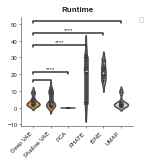

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sciviso import Violinplot

methods = ['Deep VAE', 'Shallow VAE', 'PCA', 'PHATE', 'tSNE', 'UMAP']
box_colours = ['orange', 'orange', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
box_pairs = []
for m in methods:
    if m != 'Deep VAE':
        box_pairs.append(['Deep VAE', m])
        
import time
import time
# Convert to mins, seconds and hours
runtime['Hours'] = runtime['Runtime']//3600
runtime['Minutes'] = runtime['Runtime']//60
runtime['Seconds'] = runtime['Runtime']

boxplot = Violinplot(runtime, "Tools", "Minutes", figsize=(2,2),
                  title=f'Runtime', box_pairs=box_pairs, 
                  order=methods, add_stats=True, add_dots=True)
boxplot.palette = box_colours
boxplot.plot()
plt.savefig('timing.svg')
plt.show()